In [9]:
import os
import numpy as np
import pandas as pd

time_dirc_list = ['1128_1836','1128_2219','1128_2256']
labels_dirc_list = ['100-50','150-50','75-50']
label_valid = {'Car', 'Truck', 'Bus'}
distance_list, mesh_list, labels_list, bboxSize_list = [], [], [], []

for i in range(len(time_dirc_list)):
    time_dirc = time_dirc_list[i]
    sem_pt_path = '/home/ghosnp/project/fix_space/origin/carla_dataset_tools/raw_data/record_2023_'+time_dirc+'/vehicle.tesla.model3.master/velodyne_semantic/'
    file_list = os.listdir(sem_pt_path)
    file_list = [f for f in file_list if f.endswith('.txt')]
    file_list.sort()

    for file in file_list:
        with open(sem_pt_path+file, 'r') as f:
            for line in f.readlines()[:-1]:
                line = line.split(' ')
                if line[7] in label_valid:
                    x, y = np.float64(line[3]), np.float64(line[4])
    
                    if x**2+y**2 < 60**2:
                        distance_list.append(np.sqrt(x**2+y**2))
                        mesh_list.append(line[0])
                        labels_list.append(line[7])
                        h,w,l = np.float64(line[0]), np.float64(line[1]), np.float64(line[2])
                        bboxSize_list.append(h*w*l)


In [14]:

distance_list = np.array(distance_list)
mesh_list = np.array(mesh_list, dtype=np.float64)  # Convert mesh_list to float64
bboxSize_list = np.array(bboxSize_list)

pf_l = distance_list / 60

pf_score = ((distance_list**2 * mesh_list) / np.sqrt(bboxSize_list)) / (1e6*(pf_l*np.log(pf_l)+0.5))


/tmp/ipykernel_84520/1841636086.py:7: RuntimeWarning: invalid value encountered in sqrt
  pf_score = ((distance_list**2 * mesh_list) / np.sqrt(bboxSize_list)) / (1e6*(pf_l*np.log(pf_l)+0.5))
/tmp/ipykernel_84520/1841636086.py:7: RuntimeWarning: invalid value encountered in divide
  pf_score = ((distance_list**2 * mesh_list) / np.sqrt(bboxSize_list)) / (1e6*(pf_l*np.log(pf_l)+0.5))


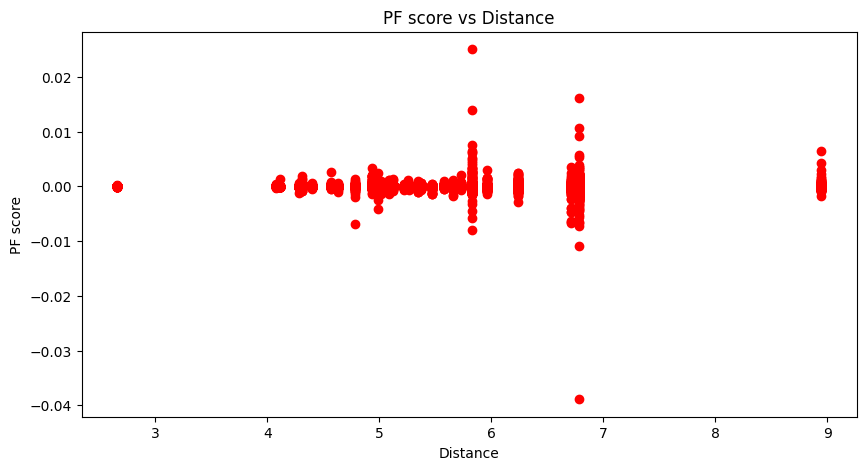

In [17]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
# show point(dist, pf_score)
plt.scatter(distance_list, pf_score,c='r')
plt.xlabel('Distance')
plt.ylabel('PF score')
plt.title('PF score vs Distance')
plt.show()